# Gaussian Process Regression

Propability distributions are propably the nightmare of most chemists as jsut from the getgo this sound super scary and mathematical.
It is mathematical but not all that scary. In fact, we can view them as something super simple to deal with if we view if through our previous knowledge from kernel ridge regression.

The scikit learn documentation summarizes this nicely by saying:

"Both kernel ridge regression and Gaussian process regression are using a so-called “kernel trick” to make their models expressive enough to fit the training data. However, the machine learning problems solved by the two methods are drastically different.

Kernel ridge regression will find the target function that minimizes a loss function (the mean squared error).

>Instead of finding a single target function, the Gaussian process regression employs a probabilistic approach : a Gaussian posterior distribution over target functions is defined based on the Bayes’ theorem, Thus prior probabilities on target functions are being combined with a likelihood function defined by the observed training data to provide estimates of the posterior distributions.
>
> -- <cite>Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
Guillaume Lemaitre <g.lemaitre58@gmail.com></cite>

Let's consider we have some strange points of data. those we write 

$g(X)=Y$

we will however just write 

$x_i$

meaning that this is some tuple or so of some data.

Now the real problem is that we don't know $g$ but we would like to get a good .. or THE best ... approximation. Enter gaussian processes. The very basic idea is that we want to maxize the likelyhood of f being the "right" function given the input values. Written in mathematical terms this translates to:

$max(p(f|x_i))$

where p stands for propability and f ist our soight after function. 

Now this is a conditional propability and we can describe this though the "Satz von Bayes" that says:

$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$

A gaussian process is thus actually trying to probe all possibile function possibile and tell us the average and most likely.

We do it a little bit simpler as we only want to interpolate values (for now). This process is called kriging.

In kriging, the goal is to interpolate or predict values at unobserved data points based on observed data. Kriging uses a Gaussian process (GP) as a model to represent the underlying function.

To understand how a GP works we need to understand something about covariances.

The GP is characterized by a mean function, which gives the expected value of the function at any given point, and a covariance function (also called the kernel function), which defines the correlation between function values at different points.

To estimate the parameters of the GP, such as the parameters of the mean function and the covariance function, we typically use a maximum likelihood estimation (MLE) approach. The MLE method finds the values of the parameters that maximize the likelihood of observing the given data.

The log marginal likelihood (also known as log-likelihood) is a measure of how well the GP model fits the observed data. It quantifies the probability of observing the data points under the GP model.

# excursion to bayesian propabilities

Let's exemplify conditional probability using a COVID test scenario with an incidence rate of 23/100,000.

Let's assume we have a COVID test that has the following properties:

    Sensitivity: The probability of a positive test result given that the person has COVID is 0.95 (95%).
    Specificity: The probability of a negative test result given that the person does not have COVID is 0.98 (98%).

In [141]:
# Function to calculate conditional probability using Bayes' theorem
def calculate_conditional_probability(p_A, p_B_given_A, p_B_given_not_A):
    p_not_A = 1 - p_A
    p_B = (p_B_given_A * p_A) + (p_B_given_not_A * p_not_A)
    p_A_given_B = (p_B_given_A * p_A) / p_B
    return p_A_given_B

# Given data
incidence_rate = 1000 / 100000  # Probability of a person having COVID (prior probability)

# Sensitivity and specificity of the COVID test
sensitivity = 0.80  # Probability of a positive test result given COVID
specificity = 0.999  # Probability of a negative test result given no COVID

#sensitivity = 0.773  # mammography
#specificity = 0.987  # mammography

# Calculate the probability of a person having COVID given a positive test result
p_A = incidence_rate  # Prior probability of having COVID
p_B_given_A = sensitivity  # Probability of a positive test given COVID
p_B_given_not_A = 1 - specificity  # Probability of a positive test given no COVID

# Calculate conditional probability P(A|B)
p_A_given_B = calculate_conditional_probability(p_A, p_B_given_A, p_B_given_not_A)

# Output the result
print("The probability of a person having COVID given a positive test result:", p_A_given_B)


The probability of a person having COVID given a positive test result: 0.889877641824249


# Definitions
Bayes' theorem is a mathematical formula that helps us update our beliefs or knowledge about something when new evidence or information becomes available. It consists of two important probabilities: the prior probability and the posterior probability.

#    Prior Probability
    The prior probability represents our initial belief or understanding about something before we have any new information or evidence. It's like our starting point or initial assumption. For example, let's say we want to know if it will rain tomorrow. Our prior probability would be our initial belief about the chance of rain without considering any other factors, like historical weather patterns or current atmospheric conditions. It's essentially what we believe before considering any specific evidence.

#    Posterior Probability
    The posterior probability is the updated belief or understanding we have after taking into account new evidence or information. It's like revising our initial belief based on the new knowledge we acquire. In our example, the posterior probability of rain tomorrow would be our revised belief after considering factors like the current weather conditions, the forecast, or any other relevant information that might affect the likelihood of rain. The posterior probability takes into account the prior probability and adjusts it based on the new evidence.

Bayes' theorem allows us to calculate the posterior probability based on the prior probability and the likelihood of the new evidence. It helps us update our beliefs in a rational and systematic way, incorporating new information as it becomes available.

So, in simple terms, the prior probability is what we initially believe or assume, while the posterior probability is what we believe after taking new evidence into account. Bayes' theorem provides a framework for updating our beliefs based on new information, allowing us to make more informed decisions or draw more accurate conclusions.

#     Latent Variable
    A latent variable is a variable that is not directly observed or measured but is inferred or assumed to exist based on other observed variables. It represents a hidden or unobservable concept or property that influences the observed data. Think of it as an underlying factor that is responsible for the patterns or relationships we observe in the data.


#     Latent Space
    A latent space is a conceptual or mathematical representation of the latent variables in a dataset. It refers to a lower-dimensional space where the relationships and patterns among the latent variables are captured. In this space, each point corresponds to a unique combination of latent variables, and similar points are close together, indicating similar underlying characteristics.

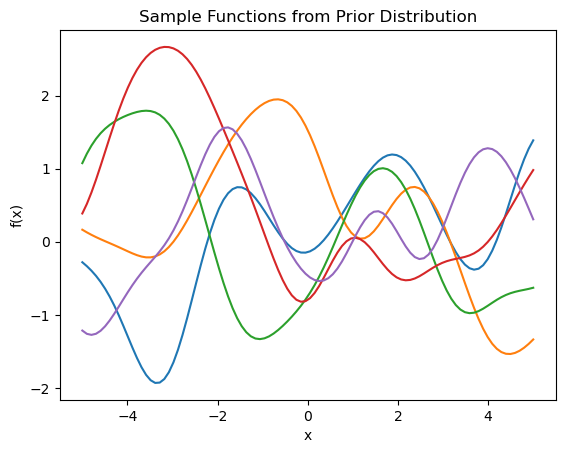

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x1, x2, sigma=1.0):
    return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * sigma ** 2))

def generate_sample_functions(x, kernel, num_samples=5):
    n = len(x)
    K = np.zeros((n, n))
    
    # Compute the covariance matrix K
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(x[i], x[j])
    
    # Generate sample functions from the prior distribution
    sample_functions = []
    for _ in range(num_samples):
        f = np.random.multivariate_normal(np.zeros(n), K)
        sample_functions.append(f)
    
    return sample_functions

# Define the input space
x = np.linspace(-5, 5, 100)

# Define the kernel function (Gaussian kernel)
kernel = lambda x1, x2: gaussian_kernel(x1, x2, sigma=1.0)

# Generate sample functions from the prior distribution
sample_functions = generate_sample_functions(x, kernel, num_samples=5)

# Plot the sample functions
for f in sample_functions:
    plt.plot(x, f)
    
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Sample Functions from Prior Distribution')
plt.show()



1. Le Gaussian Process Regression Overview:
Gaussian Process (GP) regression is a probabilistic approach for regression tasks that models the underlying function as a distribution of possible functions. Instead of estimating a single function, it provides a distribution over possible functions that fit the observed data. This distribution is characterized by a mean function and a covariance function.

Now, let's break down the steps involved in Gaussian Process regression and how the covariance is calculated using a kernel:

1. Define the Kernel Function:
The kernel function, also known as the covariance function, captures the similarity or correlation between data points. It determines how close or related two points are in the **input space**. In Gaussian Process regression, the choice of the kernel function is crucial as it encodes assumptions about the underlying function. Common kernel functions include the Gaussian kernel, linear kernel, polynomial kernel, etc.

2. Calculate the Covariance Matrix:
To perform Gaussian Process regression, we need to calculate the covariance matrix, often denoted as K. Each element K(i, j) of the covariance matrix represents the covariance between the outputs (targets) at input points x(i) and x(j). The covariance is computed using the kernel function, which measures the similarity or correlation between the inputs.

3. Incorporate Noise Variance:
In real-world scenarios, there is often noise or measurement error in the observed data. To account for this, we introduce a noise variance term, denoted as sigma^2, which represents the uncertainty or noise level in the target values. We add this noise variance as an additional term to the diagonal elements of the covariance matrix K. This accounts for the uncertainty in the observed targets.

4. Compute the Mean Function:
In Gaussian Process regression, the mean function represents the expected value or average of the underlying function. Typically, the mean function is assumed to be zero, indicating no prior bias. However, you can choose different mean functions based on prior knowledge or assumptions about the data.

5. Generate Sample Functions:
With the calculated covariance matrix and mean function, we can generate sample functions from the Gaussian distribution defined by the mean and covariance. These sample functions represent different plausible functions that fit the observed data, capturing the uncertainty in the regression problem.

Now, let's see the code that generates sample functions step by step, incorporating these concepts:

m* = m(x*) + K_*^T * K^-1 * (y - m(x))
v* = K(x*, x*) - K_*^T * K^-1 * K_*

In [142]:
import numpy as np
kernel = lambda x1, x2: gaussian_kernel(x1, x2, sigma=1.0)

def calculate_covariance_matrix(x, kernel):
    n = len(x)
    K = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(x[i], x[j])

    return K


def calculate_posterior(x, y, kernel, sigma=1.0):
    n = len(x)

    # Calculate the covariance matrices
    K = calculate_covariance_matrix(x, kernel)
    K_inv = np.linalg.inv(K)

    # Calculate the posterior mean
    posterior_mean = np.dot(K_inv, y)

    # Calculate the posterior covariance matrix
    K_post = calculate_covariance_matrix(x, kernel)
    K_post += sigma**2 * np.eye(n)
    K_post_inv = np.linalg.inv(K_post)
    posterior_cov = K_post_inv

    return posterior_mean, posterior_cov

In [143]:
# Generate some sample data
n = 10
x = np.linspace(-5, 5, n)
y = np.sin(x) + np.random.normal(0, 0.1, n)

# Define the kernel function (Gaussian kernel)

# Calculate the posterior distribution
posterior_mean, posterior_cov = calculate_posterior(x, y, kernel, sigma=0.1)

# Print the posterior mean and covariance matrix
print("Posterior Mean:\n", posterior_mean)
print("Posterior Covariance Matrix:\n", posterior_cov)


Posterior Mean:
 [ 0.65740773  0.53299207 -0.32213669 -0.72138123 -0.30081388  0.31249005
  0.92178978 -0.27285818  0.09683343 -1.0605818 ]
Posterior Covariance Matrix:
 [[ 1.55047753 -1.14971054  0.65584547 -0.34965474  0.18271982 -0.09481412
   0.04891123 -0.02483713  0.01189782 -0.00445482]
 [-1.14971054  2.40299841 -1.63599907  0.91505019 -0.48500466  0.25275399
  -0.13055781  0.06632384 -0.03177523  0.01189782]
 [ 0.65584547 -1.63599907  2.68032699 -1.78371096  0.99196458 -0.52438307
   0.27204111 -0.13838068  0.06632384 -0.02483713]
 [-0.34965474  0.91505019 -1.78371096  2.75878124 -1.82413337  1.01182768
  -0.53248626  0.27204111 -0.13055781  0.04891123]
 [ 0.18271982 -0.48500466  0.99196458 -1.82413337  2.77877136 -1.83231598
   1.01182768 -0.52438307  0.25275399 -0.09481412]
 [-0.09481412  0.25275399 -0.52438307  1.01182768 -1.83231598  2.77877136
  -1.82413337  0.99196458 -0.48500466  0.18271982]
 [ 0.04891123 -0.13055781  0.27204111 -0.53248626  1.01182768 -1.82413337
   2.7

(10, 10)


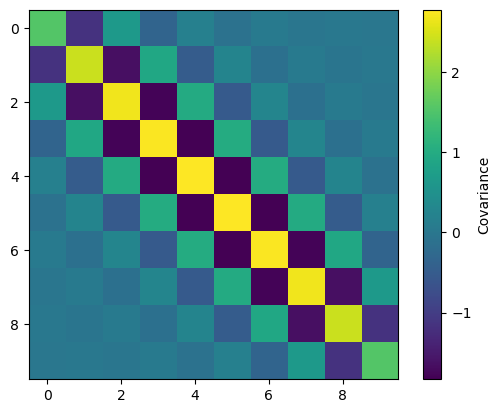

In [148]:
plt.imshow(posterior_cov)
plt.colorbar(label="Covariance")
print(posterior_cov.shape)

In [92]:
def calculate_posterior_y_variance(x, y, x_query, kernel, sigma=1.0):
    n = len(x)

    # Calculate the covariance matrices
    K = calculate_covariance_matrix(x, kernel)
    K_inv = np.linalg.inv(K)

    # Calculate the posterior mean
    posterior_mean = np.dot(K_inv, y)

    # Calculate the covariance between the query point and observed points
    k_query = np.array([kernel(x_query, xi) for xi in x])

    # Calculate the posterior covariance matrix
    K_post = calculate_covariance_matrix(x, kernel)
    K_post += sigma**2 * np.eye(n)
    K_post_inv = np.linalg.inv(K_post)

    # Calculate the y value at the query point
    y_query = np.dot(k_query, np.dot(K_post_inv, y))

    # Calculate the variance at the query point
    variance_query = kernel(x_query, x_query) - np.dot(k_query, np.dot(K_post_inv, k_query))

    return y_query, variance_query

In [121]:
#this should always give the same value but consider why :-)
x_query = 1
calculate_posterior_y_variance(x, y, x_query, kernel, sigma=1.0)

(0.5538456351020733, 0.41934794755962534)

In this code, we first define the kernel function, `gaussian_kernel`, which computes the similarity or correlation between two data points using the Gaussian kernel.

Next, we calculate the covariance matrix, `K`, using the `calculate_covariance_matrix` function. This function iterates over the input space and computes the covariance between all pairs of data points using the kernel function.

We then define the mean function as a zero array since we assume zero mean in this example.

Finally, we generate sample functions from the prior distribution by calling the `generate_sample_functions` function, which uses `np.random.multivariate_normal` to draw random samples from a multivariate normal distribution with the mean function `mean_func` and covariance matrix `K`.

By plotting these sample functions, we visualize the different plausible functions that fit the observed data, capturing the uncertainty in the Gaussian Process regression problem.

It's important to note that Kernel Ridge Regression (KRR) is closely related to Gaussian Process regression. KRR also uses a kernel function to capture the similarity between data points but focuses on finding a single best-fit function by incorporating a regularization term. Gaussian Process regression, on the other hand, provides a distribution over possible functions, allowing for uncertainty quantification. Both methods share the same principles but differ in their objectives and approaches to regression tasks.

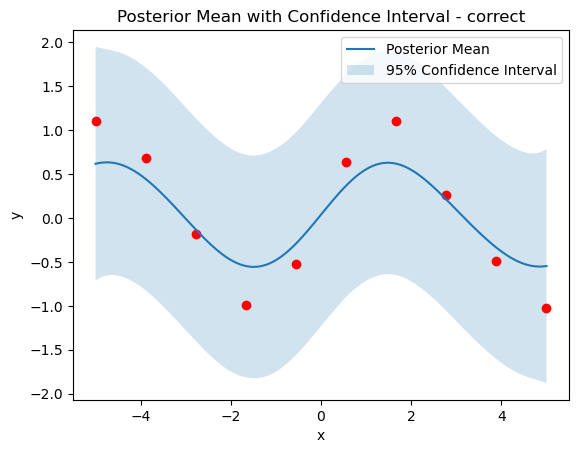

In [123]:
plt.plot(x, y, 'o', color='red')
x_query = np.linspace(-5, 5, 1000)
means, vars = [], []

for xq in x_query:
    mean, var = calculate_posterior_y_variance(x, y, xq, kernel, sigma=1.0)
    means.append(mean)
    vars.append(var)

# Calculate upper and lower bounds of the confidence interval
confidence_interval = 1.96 * np.sqrt(vars)  # 95% confidence interval

plt.plot(x_query, means, label='Posterior Mean')
plt.fill_between(x_query, np.array(means) - confidence_interval, np.array(means) + confidence_interval, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Posterior Mean with Confidence Interval - correct')
plt.legend()
plt.show()

Let's use sklearn for this ...

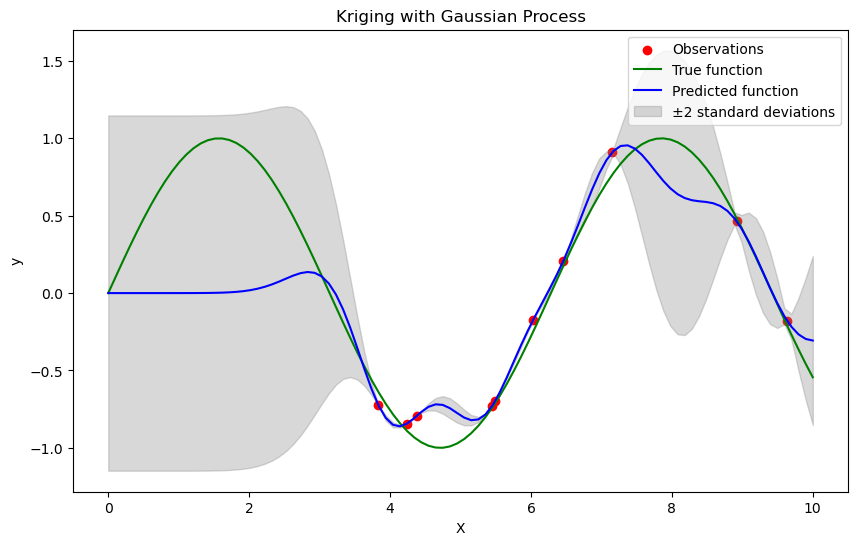

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate some sample data points
np.random.seed(0)
X = np.random.uniform(0, 10, size=(10, 1))
y = np.sin(X) + np.random.normal(0, 0.1, size=(10, 1))

# Define the kernel for the Gaussian process
kernel = C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2))

# Create the Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the Gaussian Process to the data
gp.fit(X, y)

# Generate test points for prediction
x_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Make predictions with the Gaussian Process
y_pred, std = gp.predict(x_test, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observations')
plt.plot(x_test, np.sin(x_test), color='green', label='True function')
plt.plot(x_test, y_pred, color='blue', label='Predicted function')
plt.fill_between(
    x_test.flatten(), (y_pred - 2 * std).flatten(), (y_pred + 2 * std).flatten(),
    color='gray', alpha=0.3, label='±2 standard deviations'
)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Kriging with Gaussian Process')
plt.legend()
plt.show()

Step 2: Generate the training data.
Let's assume we have some observed input-output pairs (x, y) from an unknown function f(x). For this example, we will use a sine function with some random noise.

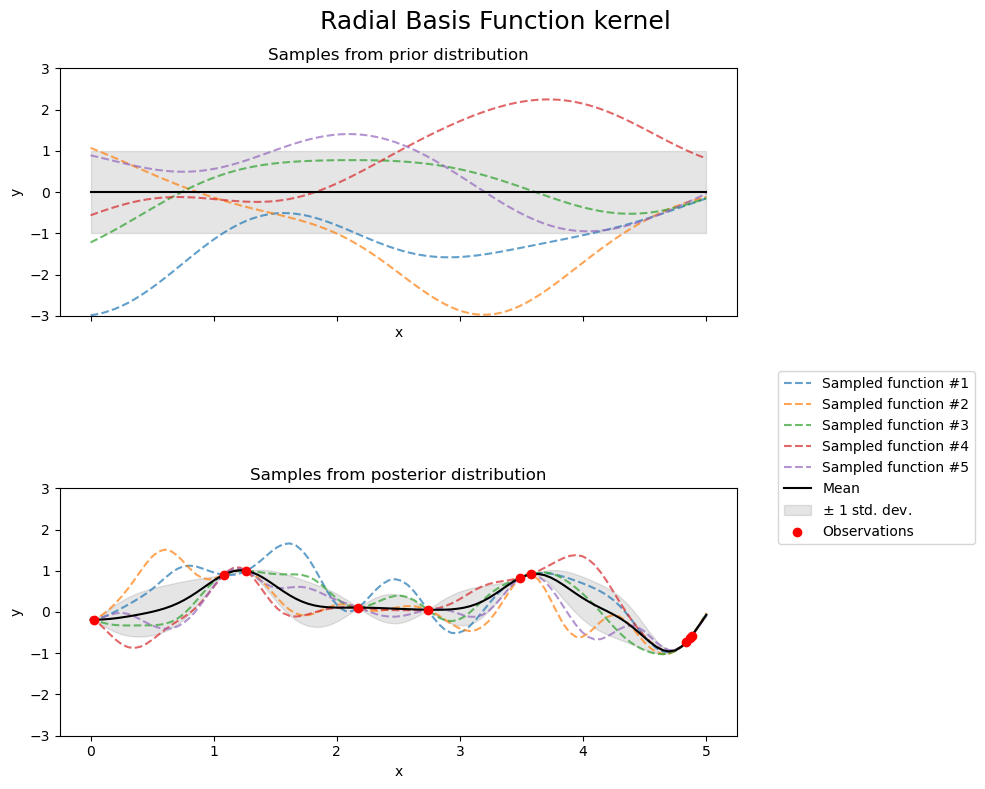

In [125]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

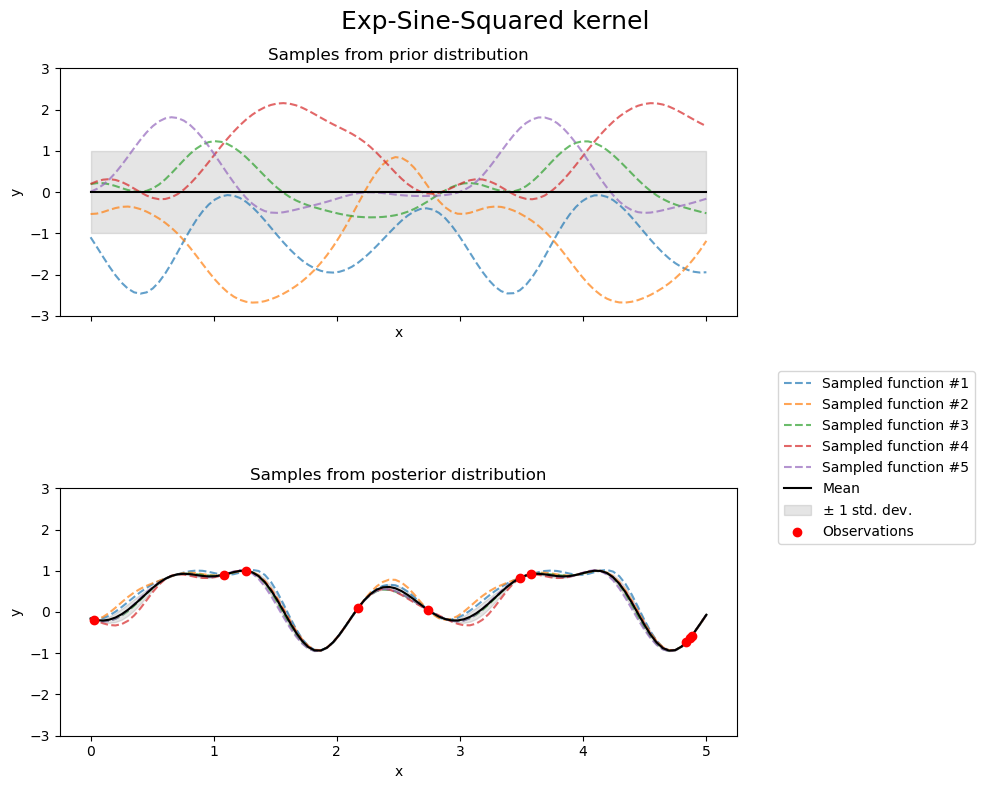

In [126]:
from sklearn.gaussian_process.kernels import ExpSineSquared

kernel = 1.0 * ExpSineSquared(
    length_scale=1.0,
    periodicity=3.0,
    length_scale_bounds=(0.1, 10.0),
    periodicity_bounds=(1.0, 10.0),
)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Exp-Sine-Squared kernel", fontsize=18)
plt.tight_layout()


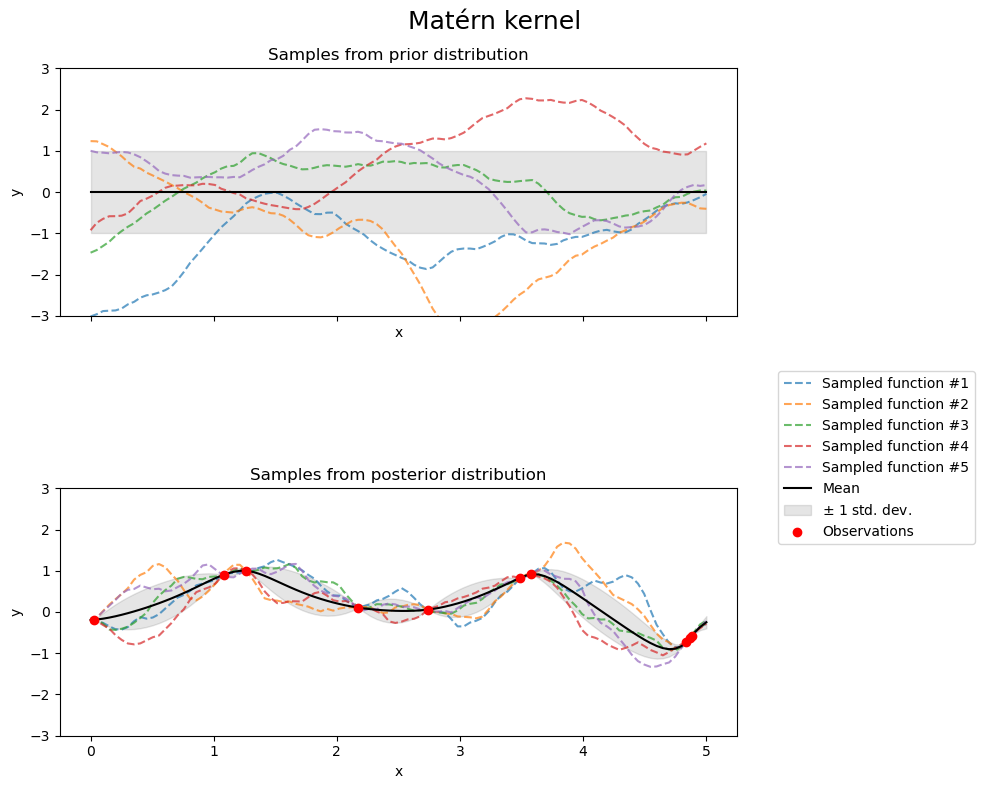

In [127]:
from sklearn.gaussian_process.kernels import Matern

kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Matérn kernel", fontsize=18)
plt.tight_layout()


# How can we use this? -> Active Learning

/Users/helgesorenstein/mambaforge/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


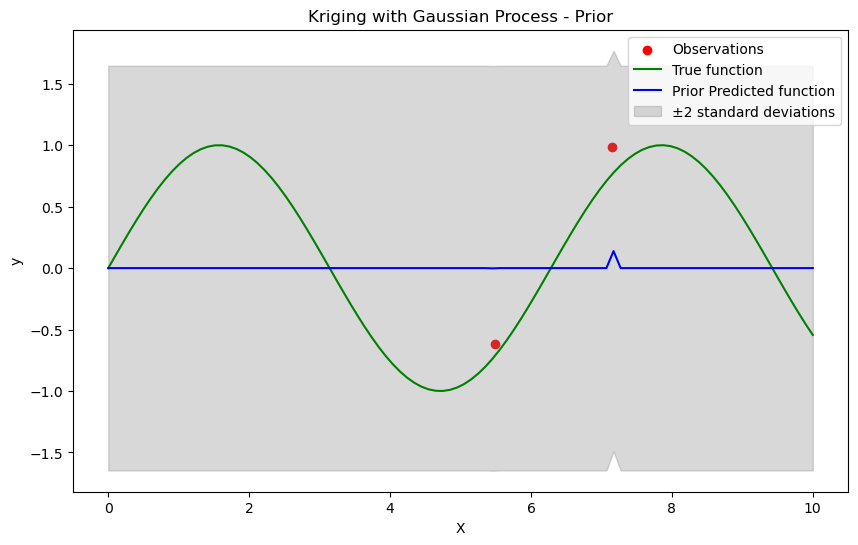

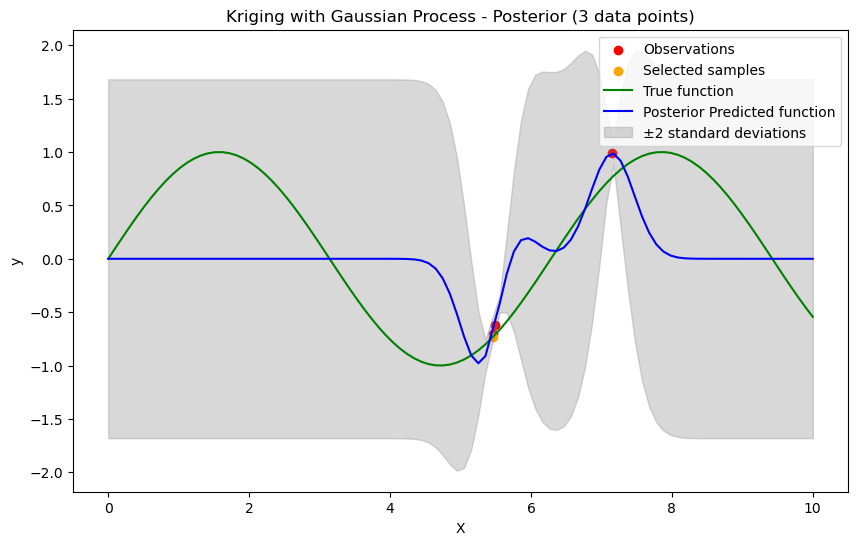

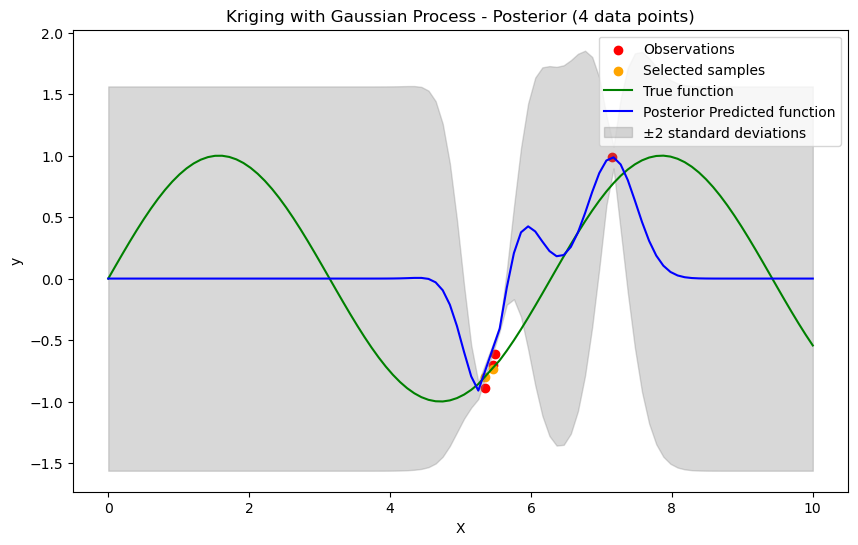

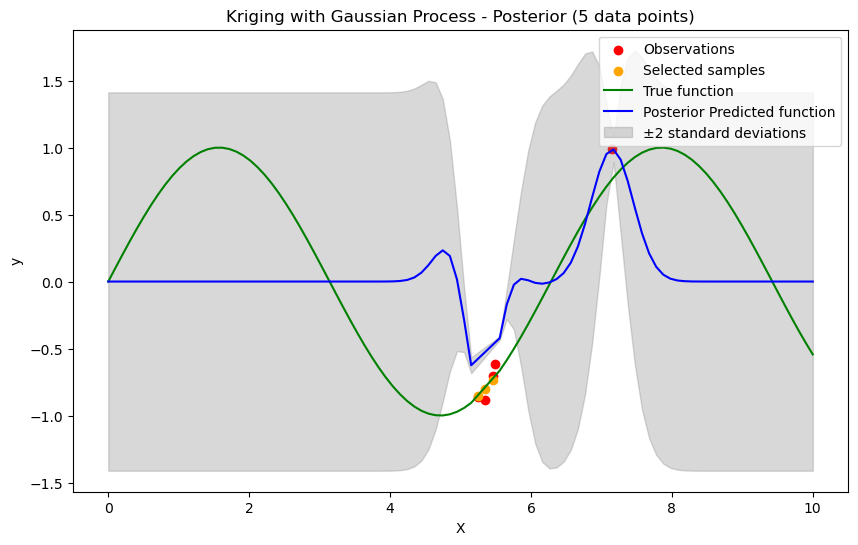

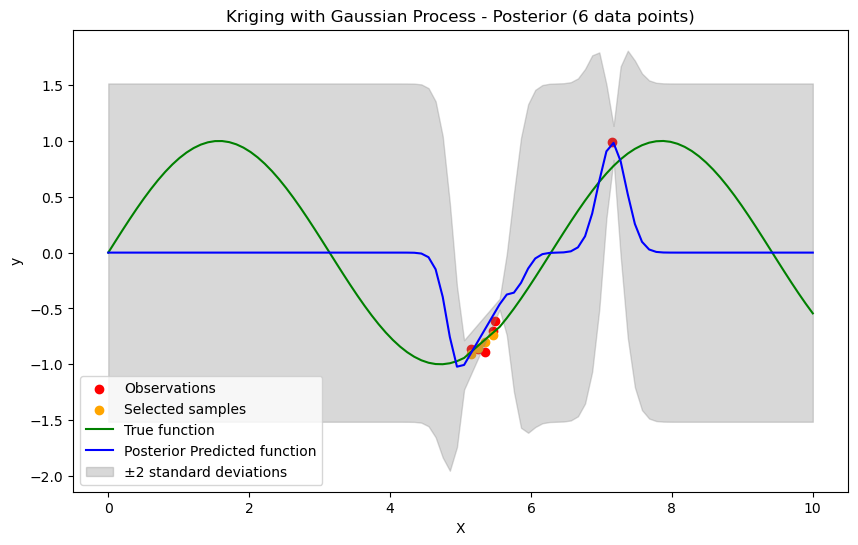

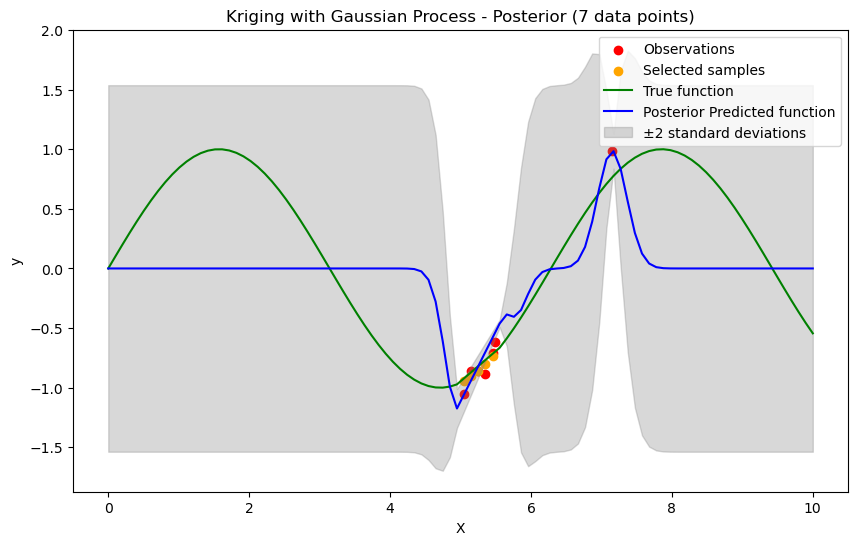

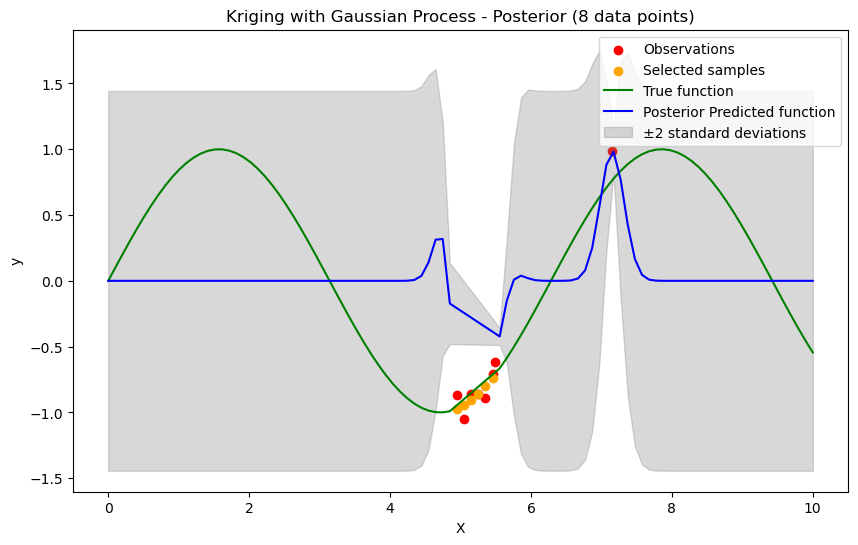

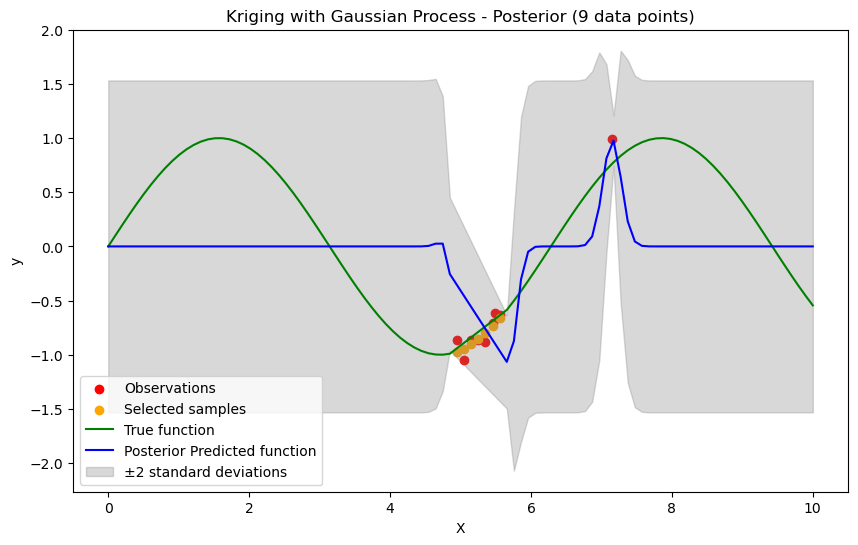

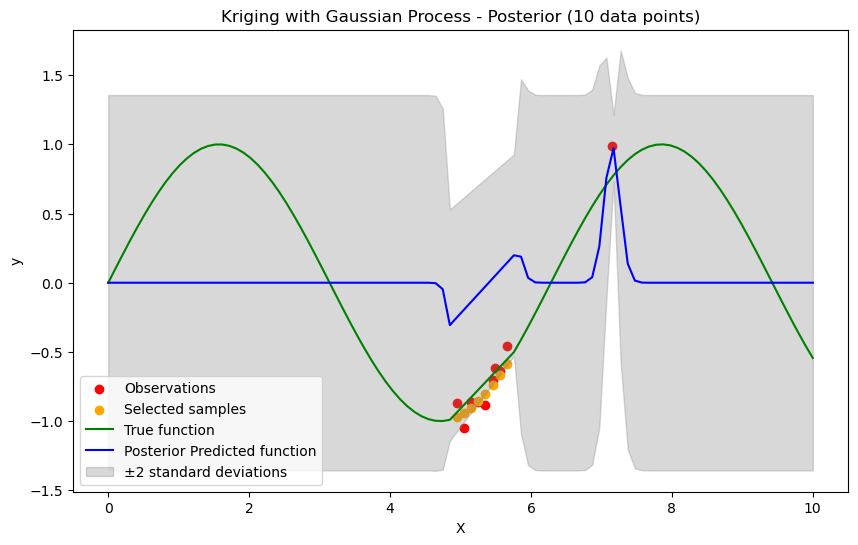

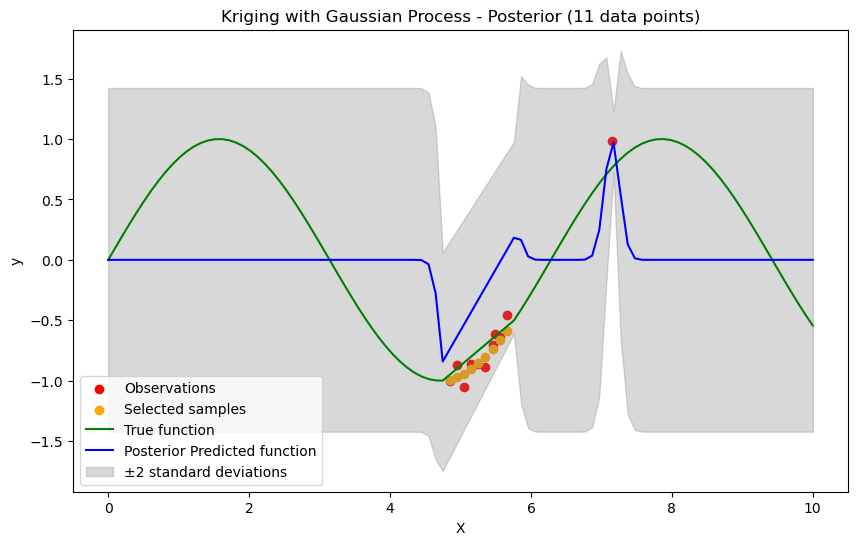

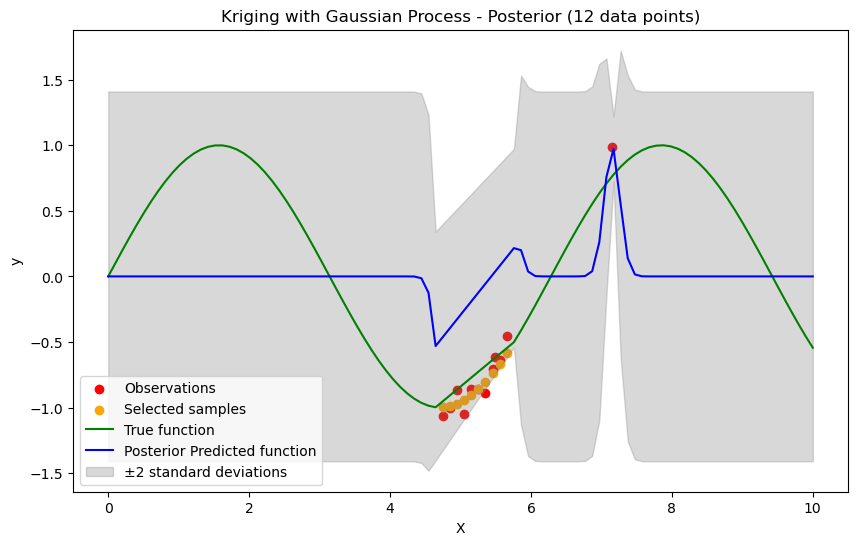

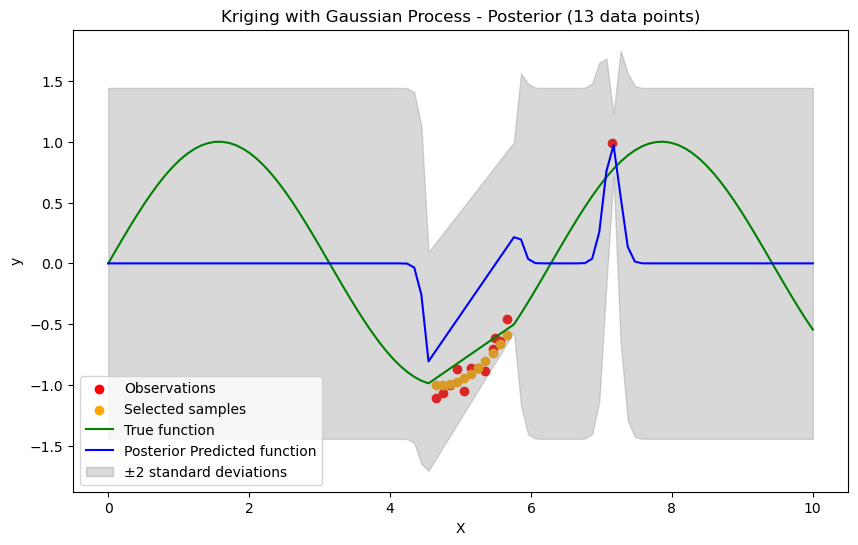

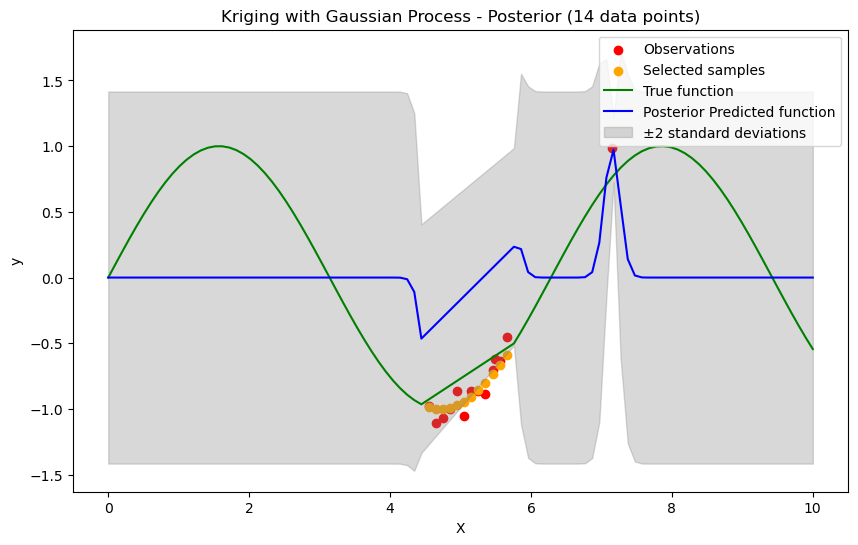

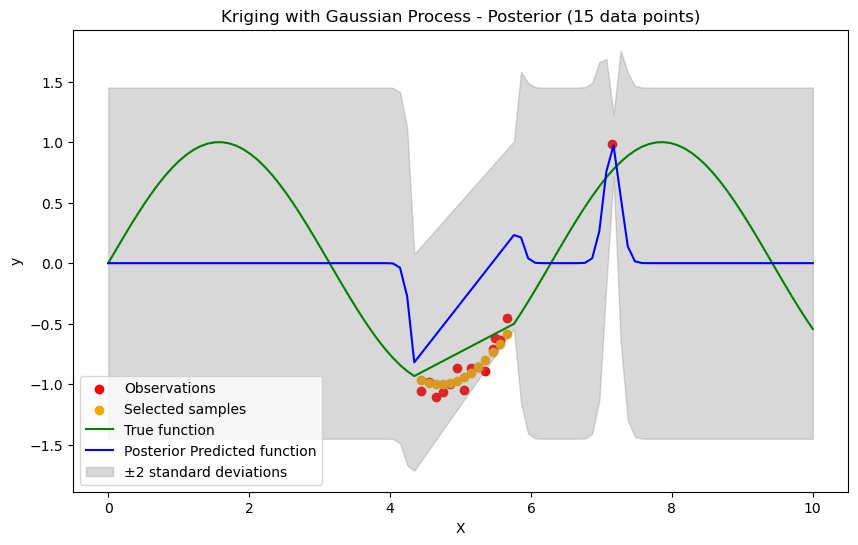

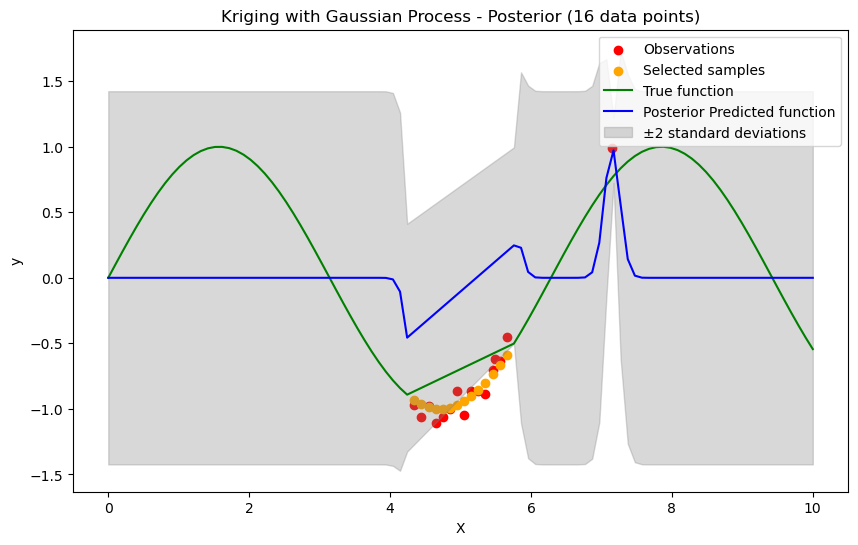

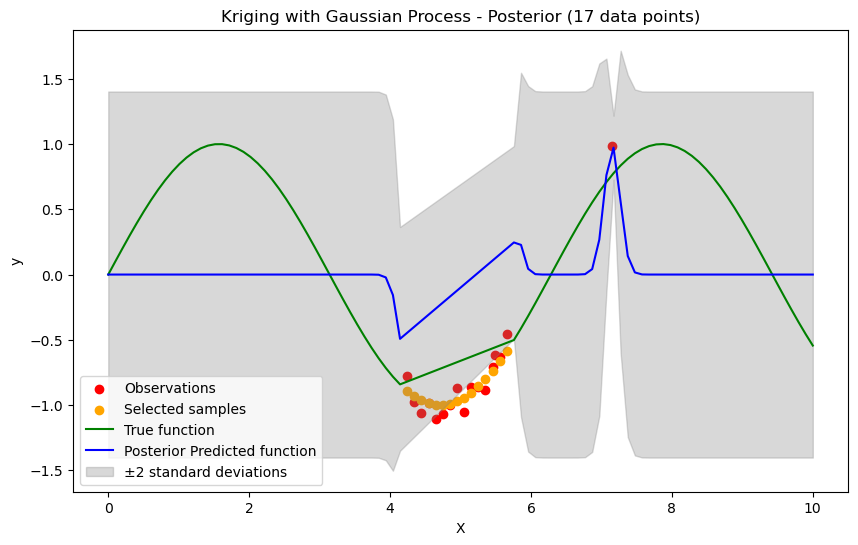

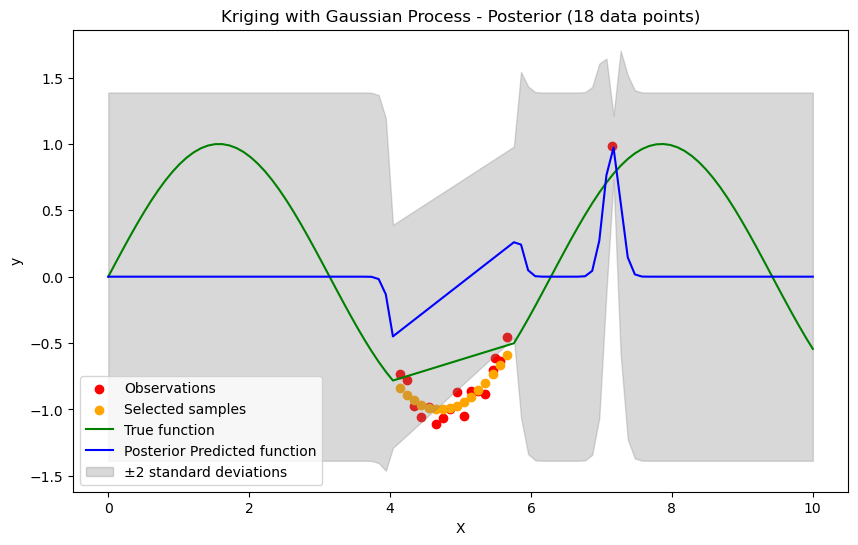

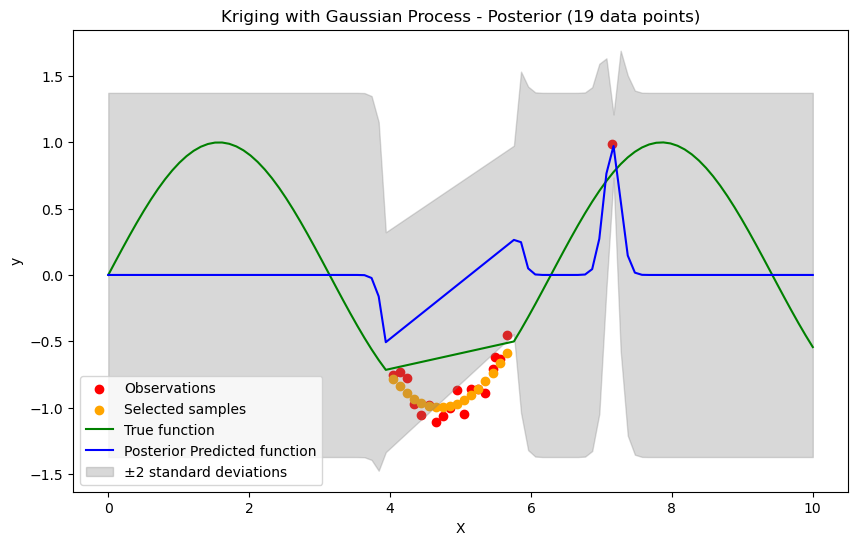

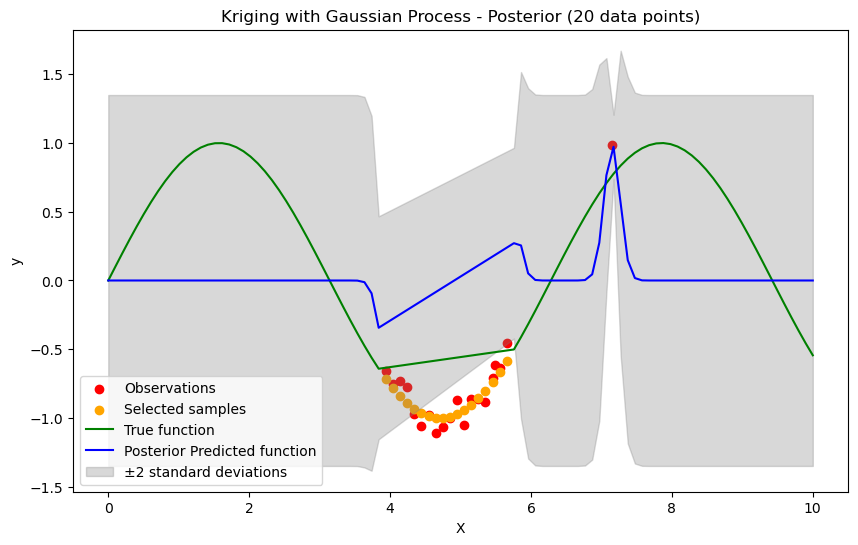

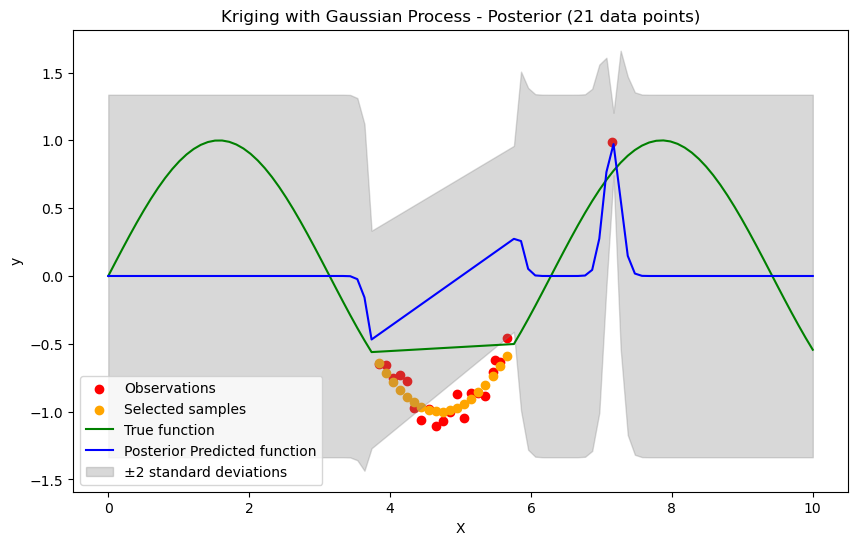

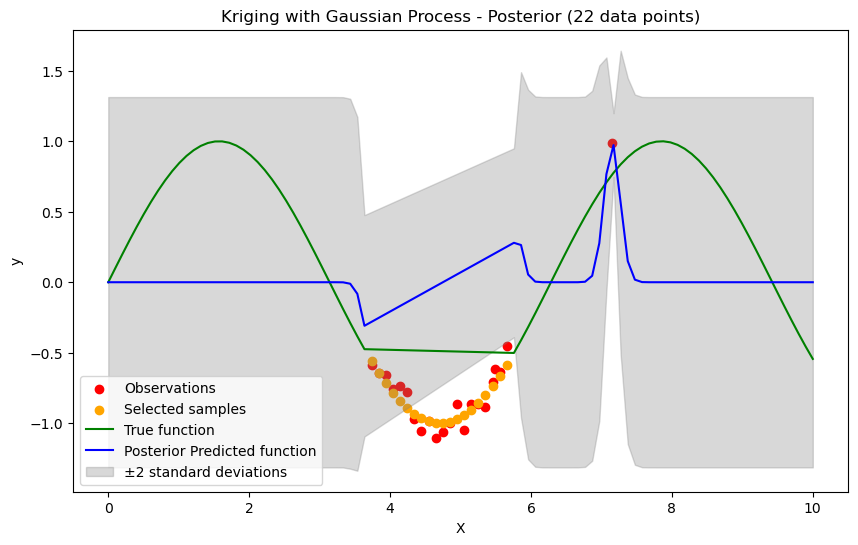

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import norm

# Generate some sample data points
np.random.seed(0)
X = np.random.uniform(0, 10, size=(2, 1))
y = np.sin(X) + np.random.normal(0, 0.1, size=(2, 1))

# Define the kernel for the Gaussian process
kernel = C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2))

# Create the Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the Gaussian Process to the data
gp.fit(X, y)

# Generate test points for prediction
x_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Make predictions with the Gaussian Process
y_pred, std = gp.predict(x_test, return_std=True)

# Plot the prior results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Observations')
plt.plot(x_test, np.sin(x_test), color='green', label='True function')
plt.plot(x_test, y_pred, color='blue', label='Prior Predicted function')
plt.fill_between(
    x_test.flatten(), (y_pred - 2 * std).flatten(), (y_pred + 2 * std).flatten(),
    color='gray', alpha=0.3, label='±2 standard deviations'
)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Kriging with Gaussian Process - Prior')
plt.legend()
plt.show()

# Define the acquisition function (Expected Improvement in this case)
def acquisition_function(x, gp, y_max):
    mean, std = gp.predict(x.reshape(-1, 1), return_std=True)
    z = (mean - y_max) / std
    return (mean - y_max) * norm.cdf(z) + std * norm.pdf(z)

# Define the acquisition function (Expected Improvement in this case)
def acquisition_function_simple(x, gp, y_max,alpha=0.5):
    mean, std = gp.predict(x.reshape(-1, 1), return_std=True)
    return alpha*(-mean)-(1-alpha)*std
    
# Number of additional points to sample
num_samples = 20

# Sample points using the acquisition function
x_samples = []
for _ in range(num_samples):
    # Compute the acquisition function values for the test points
    acquisition_values = acquisition_function_simple(x_test, gp, np.max(y))

    # Find the point with the maximum acquisition function value
    max_index = np.argmax(acquisition_values)
    x_max = x_test[max_index]

    # Add the new sample to the training data
    X = np.vstack((X, x_max))
    y = np.vstack((y, np.sin(x_max) + np.random.normal(0, 0.1)))

    # Fit the Gaussian Process to the updated data
    gp.fit(X, y)

    # Remove the selected sample from the test points
    x_test = np.delete(x_test, max_index, axis=0)

    # Store the selected sample
    x_samples.append(x_max)

    # Make predictions with the updated Gaussian Process
    y_pred, std = gp.predict(x_test, return_std=True)

    # Plot the posterior results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='Observations')
    plt.scatter(x_samples, np.sin(x_samples), color='orange', label='Selected samples')
    plt.plot(x_test, np.sin(x_test), color='green', label='True function')
    plt.plot(x_test, y_pred, color='blue', label='Posterior Predicted function')
    plt.fill_between(
        x_test.flatten(), (y_pred - 2 * std).flatten(), (y_pred + 2 * std).flatten(),
        color='gray', alpha=0.3, label='±2 standard deviations'
    )
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Kriging with Gaussian Process - Posterior ({len(X)} data points)')
    plt.legend()
    plt.show()


# discussion on active learning with paper and github repo

#another working example
https://github.com/helgestein/active_learning_learning

#paper benchmarking https://pubs.rsc.org/en/content/articlelanding/2020/sc/c9sc05999g

In [137]:
# tutorial will be on benchmarking code in active learning